# Classification
The idea in this practice is to classify the sales by the DEALSIZE variable. It can take 3 values. Use different models and compare the results. Show the accuracy for each of the models and the first classified values. 
- Regression
- KNN
- SVM
- Naive Bayes
- Random Forest 

### Import data
Firstly, import data "dummies.csv" using pandas. This data was processed in the data cleaning section.

In [18]:
#Insert your code here

In [19]:
import toggle
toggle.hide_toggle()
toggle.hide_toggle(for_next=True, toggle_text='Show Code')

In [20]:
import pandas as pd
df = pd.read_csv("dummies.csv", encoding = "ISO-8859-1")

### Show data
Now, show the columns for the loaded dataframe 

In [21]:
#Insert your code here

In [22]:
import toggle
toggle.hide_toggle()
toggle.hide_toggle(for_next=True, toggle_text='Show Code')

In [23]:
df.columns

Index(['PRICEEACH', 'SALES', 'MONTH_ID', 'YEAR_ID', 'PRODUCTLINE', 'DEALSIZE',
       'STATE_', 'STATE_BC', 'STATE_CA', 'STATE_CT', 'STATE_Isle of Wight',
       'STATE_MA', 'STATE_NH', 'STATE_NJ', 'STATE_NSW', 'STATE_NV', 'STATE_NY',
       'STATE_Osaka', 'STATE_PA', 'STATE_Quebec', 'STATE_Queensland',
       'STATE_Tokyo', 'STATE_Victoria', 'COUNTRY_Australia', 'COUNTRY_Austria',
       'COUNTRY_Belgium', 'COUNTRY_Canada', 'COUNTRY_Denmark',
       'COUNTRY_Finland', 'COUNTRY_France', 'COUNTRY_Germany',
       'COUNTRY_Ireland', 'COUNTRY_Italy', 'COUNTRY_Japan', 'COUNTRY_Norway',
       'COUNTRY_Philippines', 'COUNTRY_Singapore', 'COUNTRY_Spain',
       'COUNTRY_Sweden', 'COUNTRY_Switzerland', 'COUNTRY_UK', 'COUNTRY_USA'],
      dtype='object')

### Show values
First show the first rows. Then, Show the possible values for the variable 'DEALSIZE'

In [24]:
#Insert your code here

In [25]:
import toggle
toggle.hide_toggle()
toggle.hide_toggle(for_next=True, toggle_text='Show Code')

In [26]:
print("--------------------------")
print("--------First rows--------")
print("--------------------------")
print(df.head())
print("----------------------------------------")
print("--------DEALSIZE possible values--------")
print("----------------------------------------")
list(df['DEALSIZE'].unique())

--------------------------
--------First rows--------
--------------------------
   PRICEEACH    SALES  MONTH_ID  YEAR_ID  PRODUCTLINE  DEALSIZE  STATE_  \
0      95.70  2871.00         2     2003           -1         0       0   
1      81.35  2765.90         5     2003           -1         0       1   
2      94.74  3884.34         7     2003           -1         1       1   
3      83.26  3746.70         8     2003           -1         1       0   
4      96.66  3479.76        10     2003           -1         1       0   

   STATE_BC  STATE_CA  STATE_CT  ...  COUNTRY_Italy  COUNTRY_Japan  \
0         0         0         0  ...              0              0   
1         0         0         0  ...              0              0   
2         0         0         0  ...              0              0   
3         0         1         0  ...              0              0   
4         0         1         0  ...              0              0   

   COUNTRY_Norway  COUNTRY_Philippines  COUNTRY

[0, 1, 2]

### Split into training and test sets
We are going to split the dataset into training and test sets. With the training set the algorithm is going to learn and with the test set we are going to check how well the algorithm classifies new data.  
This can be done by using a sklearn library called model_selection.
Take into account that we want to predict DEALSIZE, so this variable is our target variable. 

In [27]:
#Insert your code here

In [28]:
import toggle
toggle.hide_toggle()
toggle.hide_toggle(for_next=True, toggle_text='Show Code')

In [53]:
#split the dataframe: X - predictors and y - target
X = df.drop('DEALSIZE', axis=1)
y = df['DEALSIZE']

#split dataset into test/train 
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.20, random_state=20)

## Run a classifier!
We are going to use different methods for classification to see how it look like each case. 
We can see that there are several parameters that can be set to tune the model. You can play with that and study what is the meaning for each case, and keep some idea about how to tune the model. In this example, as it is very simple we do not need to worry about the tuning and we are not searching for a better performance. 

### Ridge Classifier
RidgeClassifier uses a Ridge Regression to predict the classification. You can use the RidgeClassifier from sklearn.

If you want to understand how it works look at this link: https://towardsdatascience.com/ridge-regression-for-better-usage-2f19b3a202db.

In [30]:
#Insert your code here

In [31]:
import toggle
toggle.hide_toggle()
toggle.hide_toggle(for_next=True, toggle_text='Show Code')

In [54]:
from sklearn.linear_model import RidgeClassifier
clf = RidgeClassifier().fit(X_train, y_train)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print(clf.score(X_test, y_test))
df_p = pd.DataFrame()
df_p['Actual'] = y_test
df_p['Predicted'] = predictions
df_p.head()

0.8127272727272727


,Actual,Predicted
766,0,0
1050,1,0
255,1,1
826,1,1
1730,0,0


Show the confusion matrix

In [36]:
from sklearn.metrics import confusion_matrix
m = confusion_matrix(y_test, predictions)
m

array([[205,  38,   0],
       [ 35, 242,   0],
       [  0,  30,   0]])

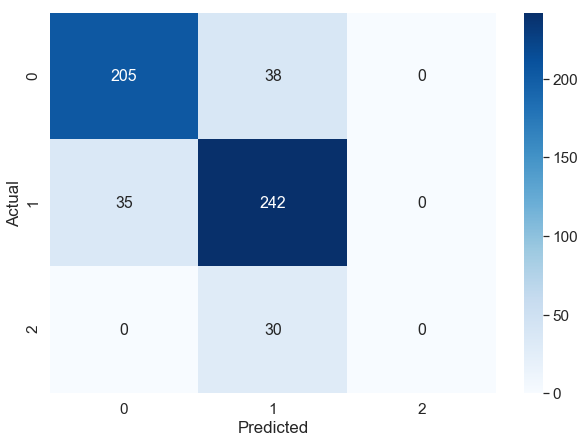

In [56]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df_cm = pd.DataFrame(m, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16}, fmt="d")# font size

### KNN Classifier
This classifier is based on the distance between data points.   
It groups into K neighbors which are nearby and a class is assigned to each group. 
New data is classified measuring the distance to the groups, and assigned the nearest class.
You can use the KNeighborsClassifier from sklearn. 

In [16]:
#Insert your code here

In [17]:
import toggle
toggle.hide_toggle()
toggle.hide_toggle(for_next=True, toggle_text='Show Code')

In [18]:
#KNN example
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))
predictions = knn.predict(X_test)
df_p = pd.DataFrame()
df_p['Actual'] = y_test
df_p['Predicted'] = predictions
df_p.head()

1.0


,Actual,Predicted
766,0,0
1050,1,1
255,1,1
826,1,1
1730,0,0


### SVC classifier
Support-vector machine represents points in the space, where different classes are divided by a gap in the space.  
New data is mapped in the space and it chooses in which class is contained by looking at the gap between the classes.  
You can use SVC from sklearn. 


In [19]:
#Insert your code here

In [20]:
import toggle
toggle.hide_toggle()
toggle.hide_toggle(for_next=True, toggle_text='Show Code')

In [21]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, y_train)
score = clf.score(X_test,y_test)
print('Score:', score)
predictions = clf.predict(X_test)
df_p = pd.DataFrame()
df_p['Actual'] = y_test
df_p['Predicted'] = predictions
df.head()

Score: 1.0


,PRICEEACH,SALES,MONTH_ID,YEAR_ID,PRODUCTLINE,DEALSIZE,STATE_,STATE_BC,STATE_CA,STATE_CT,...,COUNTRY_Italy,COUNTRY_Japan,COUNTRY_Norway,COUNTRY_Philippines,COUNTRY_Singapore,COUNTRY_Spain,COUNTRY_Sweden,COUNTRY_Switzerland,COUNTRY_UK,COUNTRY_USA
0,95.70,2871.00,2,2003,-1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,81.35,2765.90,5,2003,-1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,94.74,3884.34,7,2003,-1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,83.26,3746.70,8,2003,-1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,96.66,3479.76,10,2003,-1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


### Naive Bayes
It is based on Bayes’ Theorem and assumes that features are independent with each other. In this link you can find more information https://towardsdatascience.com/naive-bayes-classifier-81d512f50a7c  
You can use GaussianNB from sklearn. 

In [22]:
#Insert your code here

In [23]:
import toggle
toggle.hide_toggle()
toggle.hide_toggle(for_next=True, toggle_text='Show Code')

In [24]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
predictions = gnb.fit(X_train, y_train).predict(X_test)
print(gnb.score(X_test,y_test))
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != predictions).sum()))

0.6818181818181818
Number of mislabeled points out of a total 550 points : 175


### LinearDiscriminantAnalysis
This method separates or discriminates the data into classes.    
This can be used to classify but also Linear discrimination is used for dimension redaction to later classify.  
In this case, we are going to use it for the classification, but is an example to show you that the method can be used for several things. 

In [25]:
#Insert your code here

In [26]:
import toggle
toggle.hide_toggle()
toggle.hide_toggle(for_next=True, toggle_text='Show Code')

In [27]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
clf.fit(X_train, y_train)
print(clf.score(X_test,y_test))
predictions = clf.predict(X_test)
df_p = pd.DataFrame()
df_p['Actual'] = y_test
df_p['Predicted'] = predictions
df_p.head()

0.9472727272727273


,Actual,Predicted
766,0,0
1050,1,1
255,1,1
826,1,1
1730,0,0


### Random Forest
A random forest is an ensemble of different trees which are composed at the end to get the final result. You can use RandomForestClassifier from sklearn. 

In [28]:
#Insert your code here

In [29]:
import toggle
toggle.hide_toggle()
toggle.hide_toggle(for_next=True, toggle_text='Show Code')

In [30]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2,random_state=202)
clf.fit(X_train, y_train)
print('Score:',clf.score(X_test, y_test))
predictions = clf.predict(X_test)
df_p = pd.DataFrame()
df_p['Actual'] = y_test
df_p['Predicted'] = predictions
df_p.head()

Score: 0.9454545454545454


,Actual,Predicted
766,0,0
1050,1,1
255,1,1
826,1,1
1730,0,0


Show the variables' importance in a graph, you can create a dataframe with clf.feature_importances_ and plot it

In [31]:
#Insert your code here

In [32]:
import toggle
toggle.hide_toggle()
toggle.hide_toggle(for_next=True, toggle_text='Show Code')

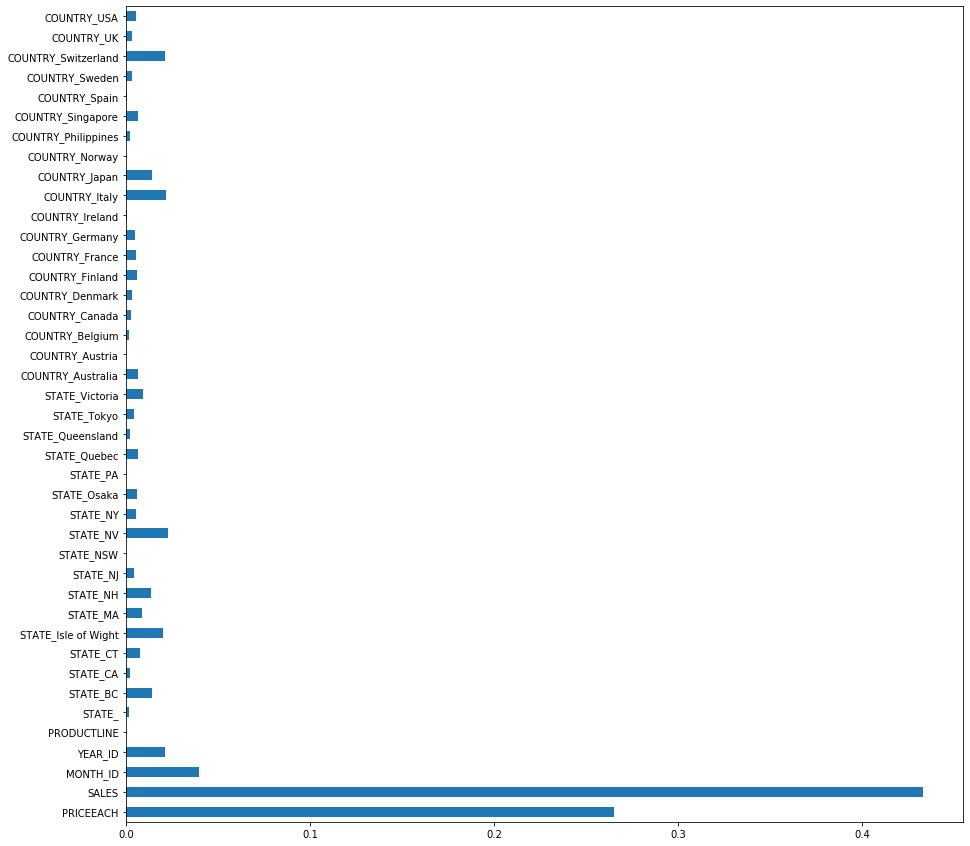

In [33]:
import matplotlib.pyplot as plt
feat_importances = pd.Series(clf.feature_importances_, index=X.columns)
fig, ax = plt.subplots(1,1, figsize=(15, 15))
feat_importances.plot(kind='barh', ax=ax)
plt.show()